# Ejercicios 2

## Parte 3

_Nota:_ Todas las funciones siguientes suponen mismo tamaño de bin y de caja para DD, RR y DR.

#### 3. Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de

#### a) Peebles - Hauser

El estimador de Peebles-Hauser es

$$
\frac{1}{n^2_{est}} \frac{DD}{RR} - 1
$$

donde las $n$ son el número de puntos de la distibución aleatoria y la de datos, respectivamente, $1/n^2_{est} = n_R(n_R - 1)/n_D(n_d - 1)$ y $DD$ y $RR$ son los histogramas de las distribuciones.

#### b) Davis-Peebles

El estimados de Davis-Peebles es

$$
\frac{1}{n_{est}}\frac{DD}{DR} - 1
$$

donde $DR$ es el histograma de las distancias entre los puntos de los datos y del random.

#### c) Hamilton

El estimador de Hamilton es

$$
\frac{DDRR}{DR^2}
$$

#### d) Landy-Szalay

El estimador de Landy-Szalay es

$$
\frac{1}{n_{est}^2}\frac{DD}{RR} + 1 - 2\frac{1}{n_{est}}\frac{DR}{RR}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import distros # Funciones creadas en las partes 1 y 2 de este ejercicio

Las siguientes funciones se añadirán al módulo _distros.py_

In [2]:
def saca_los_XX(x_data, y_data, nR, box_size, bin_size):
    x_RR, y_RR = distros.create_rand_dist(box_size, nR)
    dist_RR, histo_RR = distros.save_hist(x_RR, y_RR, box_size, bin_size)
    dist_DD, histo_DD = distros.save_hist(x_data, y_data, box_size, bin_size)
    dist_DR, histo_DR = distros.save_hist_DR(x_data, y_data, box_size, x_RR, y_RR, box_size, bin_size)
    nD = len(x_data)
    inv_nest = math.sqrt(nR * (nR - 1.0) / (nD * (nD - 1.0)))
    RR = histo_RR[0]
    DD = histo_DD[0]
    DR = histo_DR[0]
    
    return RR, DD, DR, inv_nest

In [3]:
def peebles_hauser(RR, DD, inv_nest):
    return DD * inv_nest**2 / RR - 1.0

In [4]:
def davis_peebles(DD, DR, inv_nest):
    return inv_nest * DD / DR - 1.0

In [5]:
def hamilton(DD, RR, DR):
    return RR * DD / DR**2

In [6]:
def landy_szalay(DD, RR, DR, inv_nest):
    return inv_nest**2 * DD / RR + 1.0 - 2.0 * inv_nest * DR / RR

### Malla cuadriculada

In [7]:
box_size = 500
net_size = 10.0
bin_size = 5.0

In [10]:
x_malla, y_malla = distros.unif_cuad_dist(box_size, net_size)
dist_malla, hist_malla = distros.save_hist(x_malla, y_malla, box_size, bin_size)
frec_malla = hist_malla[0]
bins_malla = hist_malla[1]
bins_malla = bins_malla[:-1]

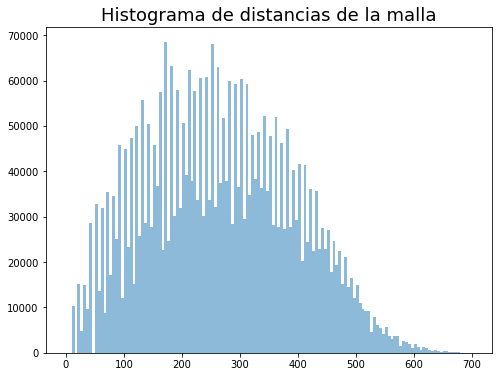

In [11]:
plt.figure(figsize = (8, 6))
plt.hist(dist_malla, bins = bins_malla, alpha = 0.5);
plt.title('Histograma de distancias de la malla', fontsize = 18);

In [12]:
n_malla = len(x_malla)
n_random = 2 * n_malla
RR, DD, DR, inv_nest = saca_los_XX(x_malla, y_malla, n_random, box_size, bin_size)

In [13]:
corr_PB = peebles_hauser(RR, DD, inv_nest)

In [14]:
corr_DP = davis_peebles(DD, DR, inv_nest)

In [15]:
corr_H = hamilton(DD, RR, DR)

In [16]:
corr_LS = landy_szalay(DD, RR, DR, inv_nest)

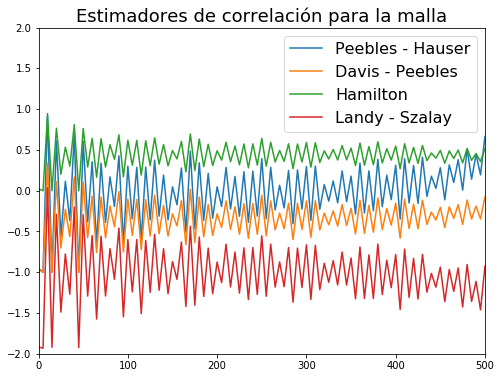

In [21]:
plt.figure(figsize = (8,6))
plt.plot(bins_malla, corr_PB, label = "Peebles - Hauser")
plt.plot(bins_malla, corr_DP, label = "Davis - Peebles")
plt.plot(bins_malla, corr_H, label = "Hamilton")
plt.plot(bins_malla, corr_LS, label = "Landy - Szalay")
plt.xlim([0.0, 500.0])
plt.ylim([-2.0, 2.0])
plt.legend(fontsize = 16)
plt.title('Estimadores de correlación para la malla', fontsize = 18);

Hay picos cada diez unidades (la distancia característica de la malla) y la función se mueve alrededor de cero. Parece tener sentido.

### Disco

In [8]:
n_points = 1000
radius = 300.0
box_size = 600
bin_size = 5.0

In [9]:
x_disco, y_disco = distros.unif_disc_dist(n_points, radius, box_size / 2.0, box_size / 2.0)
dist_disco, hist_disco = distros.save_hist(x_disco, y_disco, box_size, bin_size)
frec_disco = hist_disco[0]
bins_disco = hist_disco[1]
bins_disco = bins_disco[:-1]

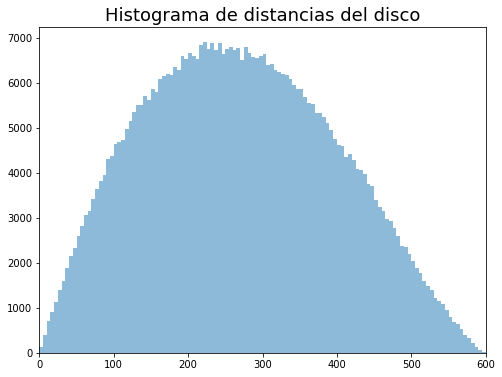

In [10]:
plt.figure(figsize = (8, 6))
plt.hist(dist_disco, bins = bins_disco, alpha = 0.5);
plt.xlim([0.0, 600.0])
plt.title('Histograma de distancias del disco', fontsize = 18);

In [11]:
n_disco = len(x_disco)
n_random = 5 * n_disco
RR, DD, DR, inv_nest = saca_los_XX(x_disco, y_disco, n_random, box_size, bin_size)

In [12]:
corr_PB = peebles_hauser(RR, DD, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
corr_DP = davis_peebles(DD, DR, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [14]:
corr_H = hamilton(DD, RR, DR)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [15]:
corr_LS = landy_szalay(DD, RR, DR, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


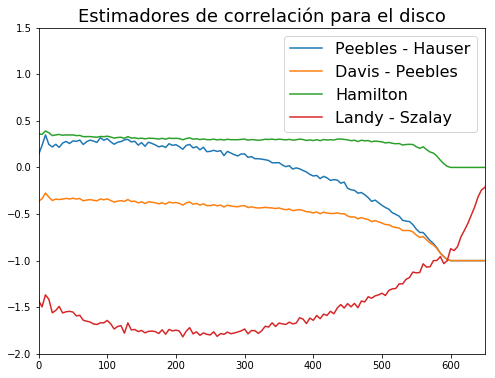

In [18]:
plt.figure(figsize = (8,6))
plt.plot(bins_disco, corr_PB, label = "Peebles - Hauser")
plt.plot(bins_disco, corr_DP, label = "Davis - Peebles")
plt.plot(bins_disco, corr_H, label = "Hamilton")
plt.plot(bins_disco, corr_LS, label = "Landy - Szalay")
plt.xlim([0.0, 650.0])
plt.ylim([-2.0, 1.5])
plt.legend(fontsize = 16)
plt.title('Estimadores de correlación para el disco', fontsize = 18);

Aquí sí que no veo nada :(

### Anillo

In [29]:
n_points = 1000
r_int = 290.0
r_ext = 300.0
box_size = 1000.0
bin_size = 5.0

In [30]:
x_anillo, y_anillo = distros.anillo_dist(n_points, r_int, r_ext, box_size / 2.0, box_size / 2.0)
dist_anillo, hist_anillo = distros.save_hist(x_anillo, y_anillo, box_size, bin_size)
frec_anillo = hist_anillo[0]
bins_anillo = hist_anillo[1]
bins_anillo = bins_anillo[:-1]

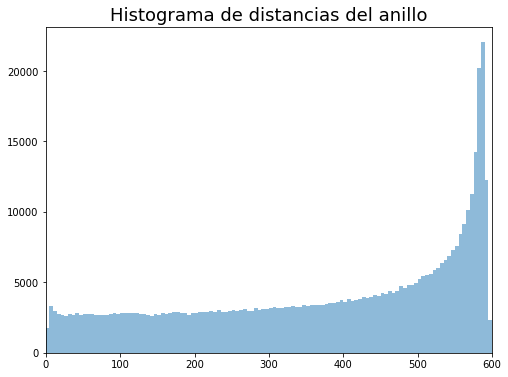

In [31]:
plt.figure(figsize = (8, 6))
plt.hist(dist_anillo, bins = bins_anillo, alpha = 0.5);
plt.xlim([0.0, 600.0])
plt.title('Histograma de distancias del anillo', fontsize = 18);

In [32]:
n_anillo = len(x_anillo)
n_random = 5 * n_anillo
RR, DD, DR, inv_nest = saca_los_XX(x_anillo, y_anillo, n_random, box_size, bin_size)

In [33]:
corr_PB = peebles_hauser(RR, DD, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [34]:
corr_DP = davis_peebles(DD, DR, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [35]:
corr_H = hamilton(DD, RR, DR)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [36]:
corr_LS = landy_szalay(DD, RR, DR, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


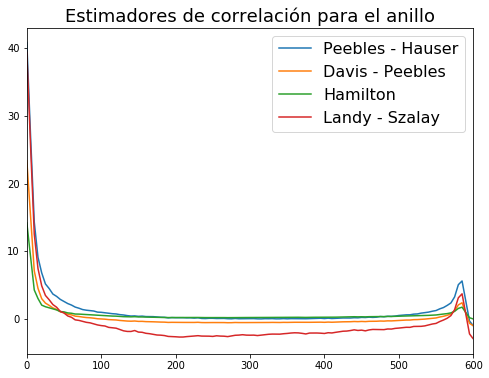

In [37]:
plt.figure(figsize = (8,6))
plt.plot(bins_anillo, corr_PB, label = "Peebles - Hauser")
plt.plot(bins_anillo, corr_DP, label = "Davis - Peebles")
plt.plot(bins_anillo, corr_H, label = "Hamilton")
plt.plot(bins_anillo, corr_LS, label = "Landy - Szalay")
plt.xlim([0.0, 600.0])
#plt.ylim([-2.0, 1.5])
plt.legend(fontsize = 16)
plt.title('Estimadores de correlación para el anillo', fontsize = 18);

¿Pico en el diámetro interno?

### Círculos

In [7]:
box_size = 1000
n_rings = 50
n_points = 100
radius = 100.0
bin_size = 15.0

In [8]:
x_aros, y_aros = distros.unif_circles_dist(box_size, n_rings, n_points, radius)
dist_aros, hist_aros = distros.save_hist(x_aros, y_aros, box_size, bin_size)
frec_aros = hist_aros[0]
bins_aros = hist_aros[1]
bins_aros = bins_aros[:-1]

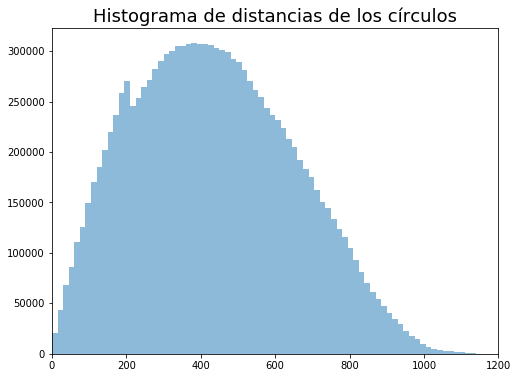

In [9]:
plt.figure(figsize = (8, 6))
plt.hist(dist_aros, bins = bins_aros, alpha = 0.5);
plt.xlim([0.0, 1200.0])
plt.title('Histograma de distancias de los círculos', fontsize = 18);

In [10]:
n_aros = len(x_aros)
n_random = n_aros
RR, DD, DR, inv_nest = saca_los_XX(x_aros, y_aros, n_random, box_size, bin_size)

In [11]:
corr_PB = peebles_hauser(RR, DD, inv_nest)

In [12]:
corr_DP = davis_peebles(DD, DR, inv_nest)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [13]:
corr_H = hamilton(DD, RR, DR)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [14]:
corr_LS = landy_szalay(DD, RR, DR, inv_nest)

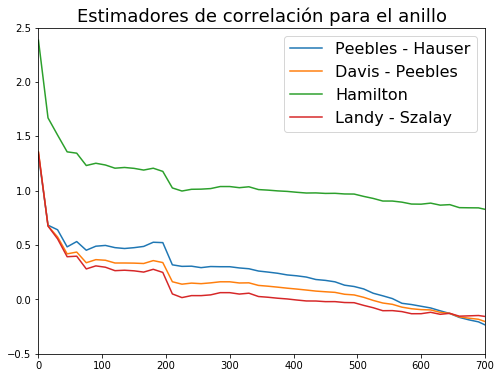

In [18]:
plt.figure(figsize = (8,6))
plt.plot(bins_aros, corr_PB, label = "Peebles - Hauser")
plt.plot(bins_aros, corr_DP, label = "Davis - Peebles")
plt.plot(bins_aros, corr_H, label = "Hamilton")
plt.plot(bins_aros, corr_LS, label = "Landy - Szalay")
plt.xlim([0.0, 700.0])
plt.ylim([-0.5, 2.5])
plt.legend(fontsize = 16)
plt.title('Estimadores de correlación para el anillo', fontsize = 18);

Ahora sí se ve el pico en el diámetro.